In [1]:
library(ISLR)
library(tree)
#Carseats dataset 
#https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/Carseats
# ?Carseats

In [2]:
# fix(Carseats)
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [3]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [4]:
sum(is.na(Carseats))

[1] 0

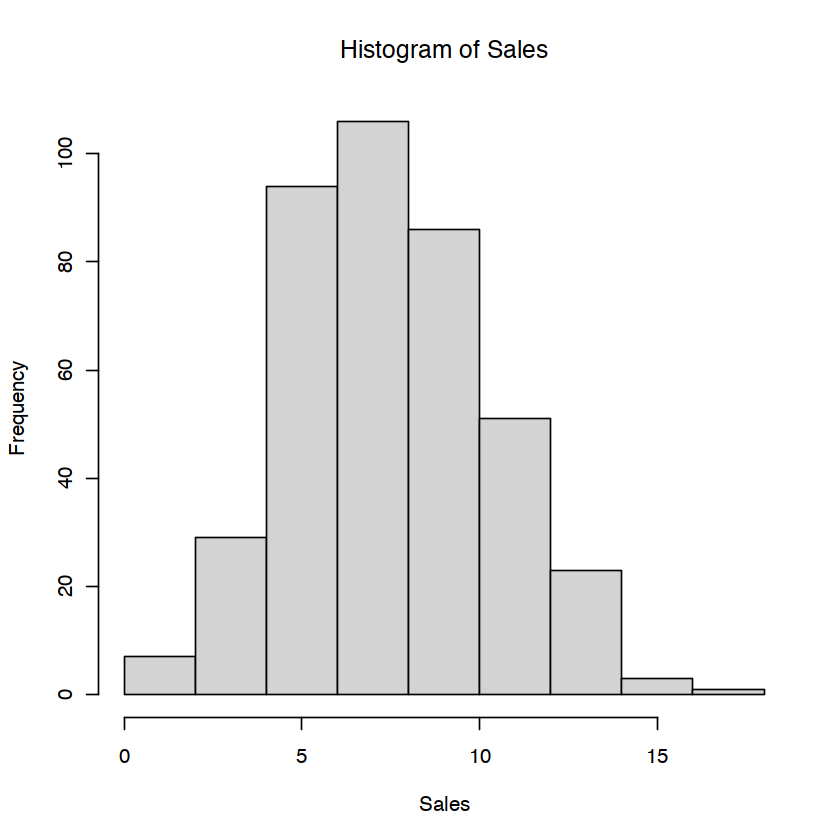

In [5]:
attach(Carseats)
hist(Sales)

In [6]:
#create binary variable (High)
High=ifelse(Sales<=8,"No","Yes")
Carseats[, "High"] <- as.factor(High) # outcome should be factor

# Fit trees

In [7]:
#fit a tree to data
tree.carseats=tree(High~.-Sales,Carseats)

In [8]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

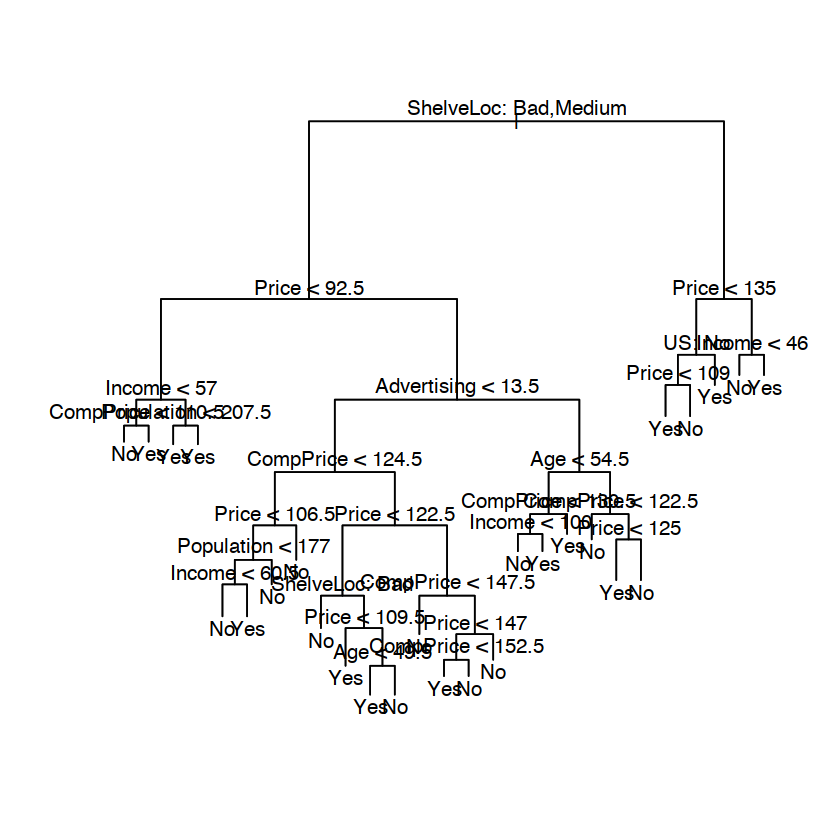

In [9]:
plot(tree.carseats)
text(tree.carseats,pretty=0)
tree.carseats

# Training and Testing

In [10]:
set.seed(2)
n=nrow(Carseats)
train=sample(1:n, 200)
Carseats.test=Carseats[-train,]
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")

In [11]:
High.test=Carseats[-train, "High"]
table(tree.pred,High.test)

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50

# Prune trees

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

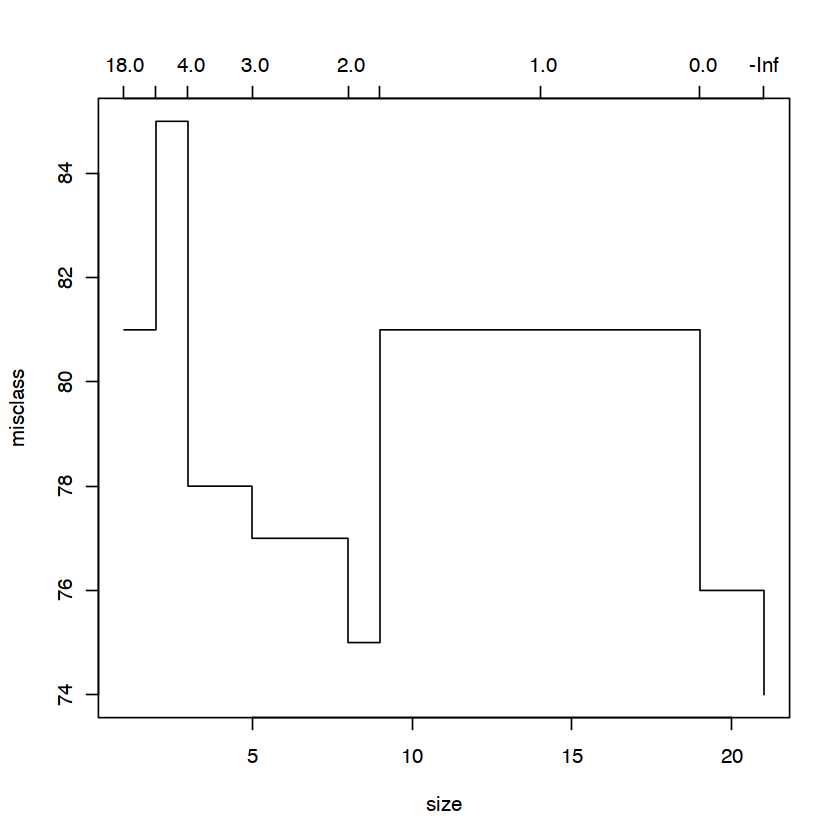

In [12]:
set.seed(3)
cv.carseats=cv.tree(tree.carseats, FUN=prune.misclass) #default: deviance
cv.carseats
plot(cv.carseats)

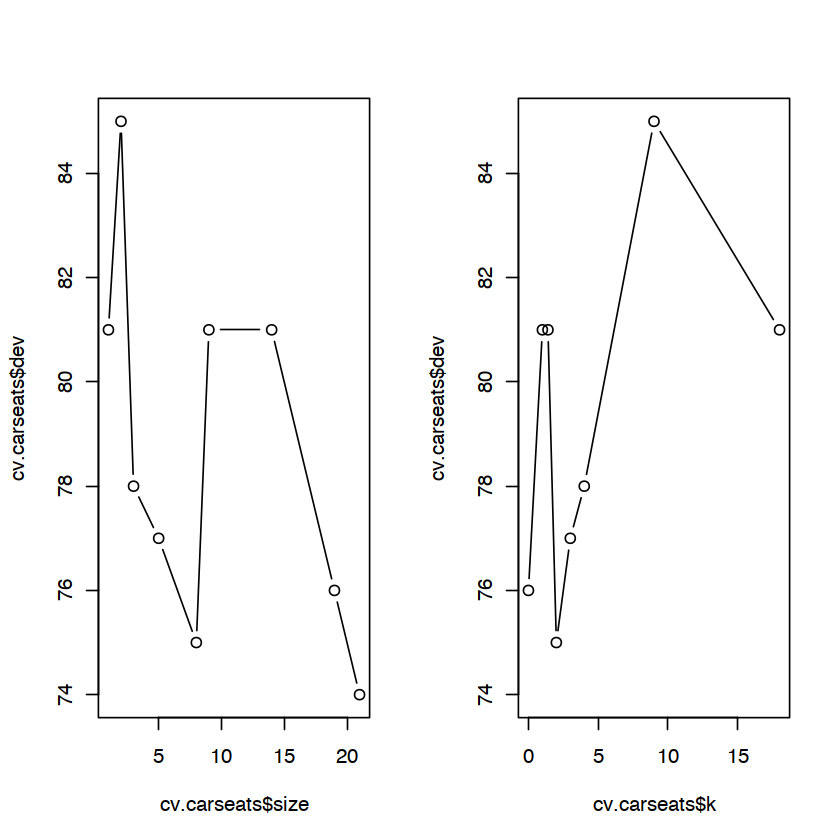

In [13]:
#dev corresponds to the cross-validation error rate in this instance
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b") #misclass 
plot(cv.carseats$k,cv.carseats$dev,type="b")  #cost-complexity parameter (related to \alpha in 8.4)

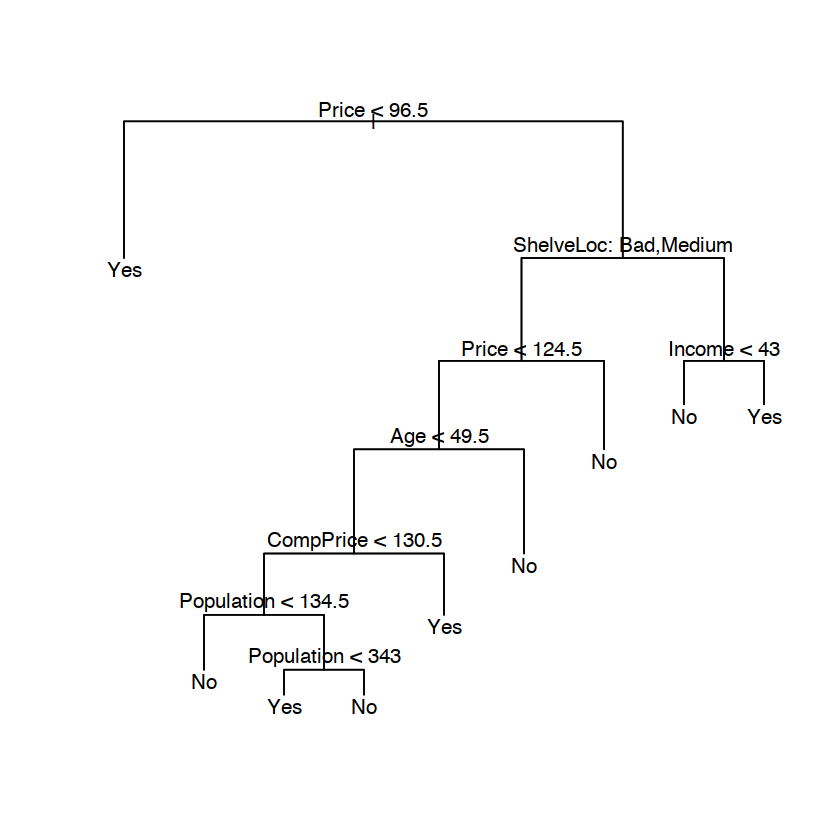

In [14]:
prune.carseats=prune.misclass(tree.carseats,best=9) # 9 groups/clusters/leaves/terminal nodes from the tree
plot(prune.carseats)
text(prune.carseats,pretty=0)

In [15]:
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

         High.test
tree.pred No Yes
      No  97  25
      Yes 20  58

         High.test
tree.pred  No Yes
      No  102  30
      Yes  15  53

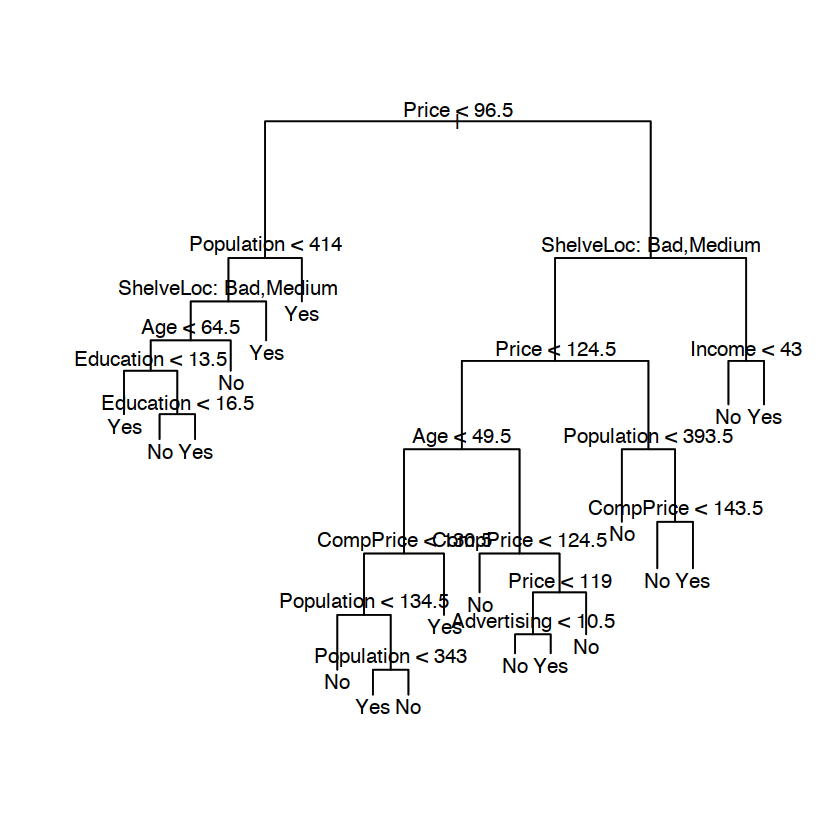

In [16]:
prune.carseats=prune.misclass(tree.carseats,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

# Regression Trees


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "age"   "tax"   "dis"  
Number of terminal nodes:  9 
Residual mean deviance:  10.61 = 2589 / 244 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-11.1200  -1.9810  -0.1276   0.0000   2.0210  15.4700 

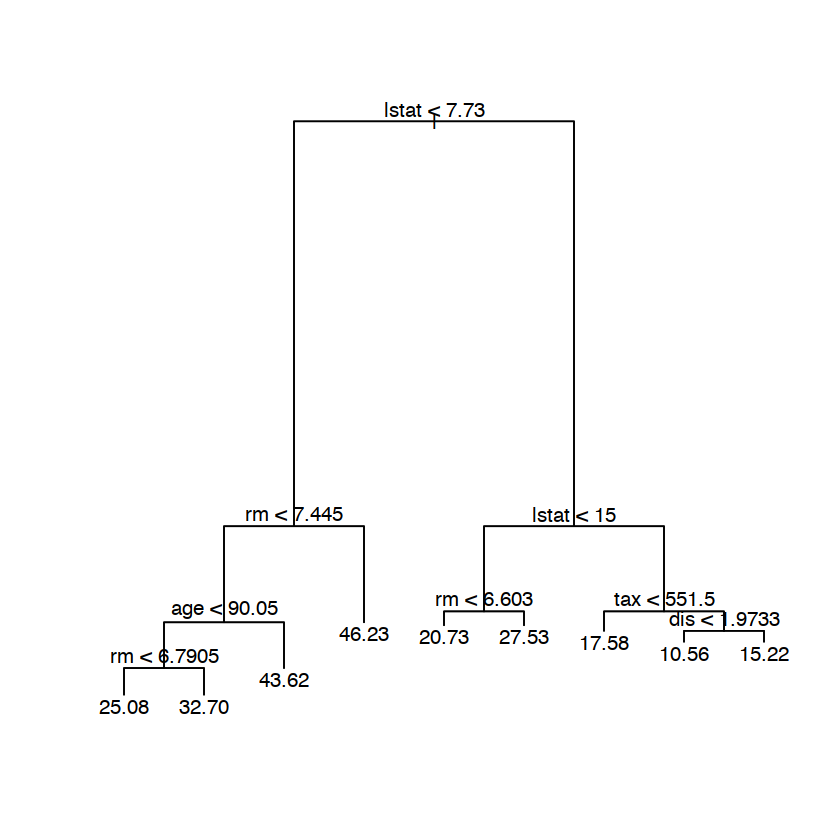

In [17]:
library(MASS)
set.seed(100)
#Boston dataset
#https://www.rdocumentation.org/packages/MASS/versions/7.3-47/topics/Boston
train = sample(1:nrow(Boston), nrow(Boston)/2)#
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)
plot(tree.boston)
text(tree.boston,pretty=0)

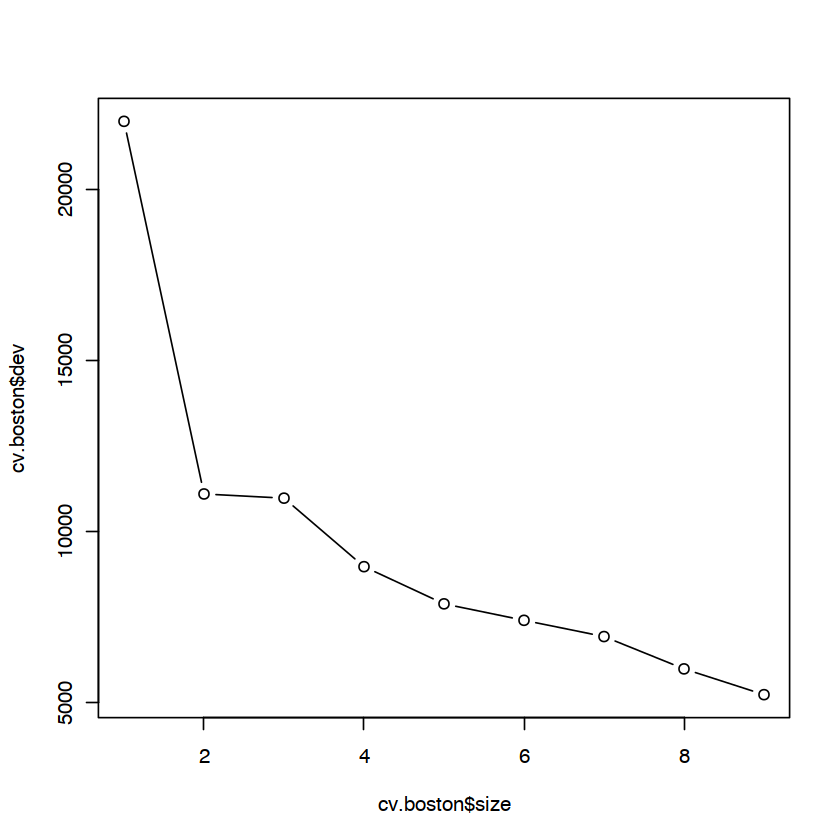

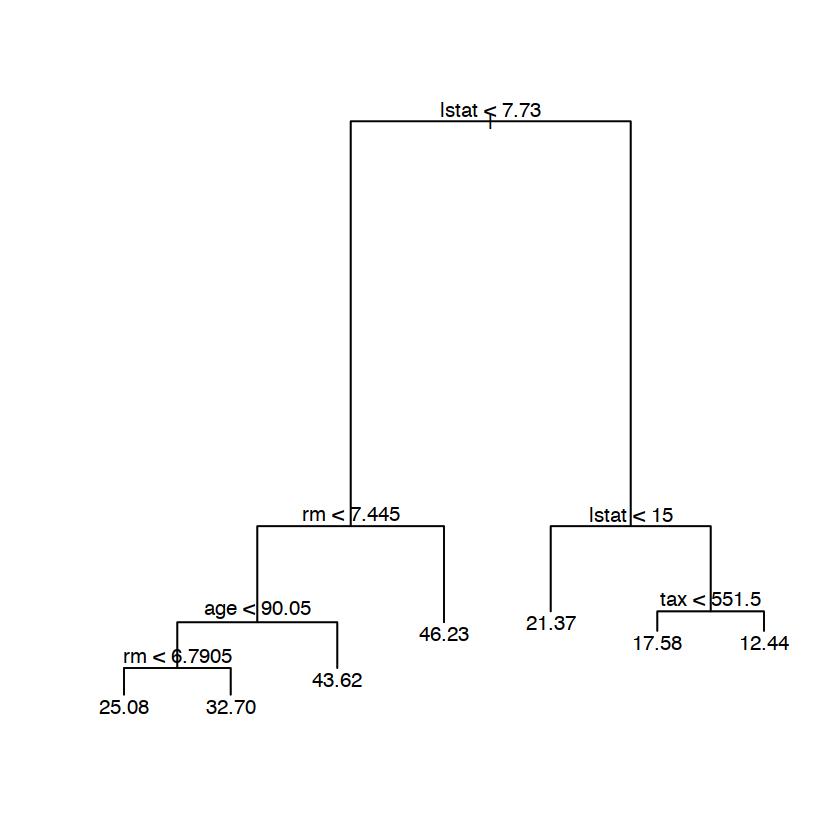

In [18]:
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')
prune.boston=prune.tree(tree.boston,best=7)
plot(prune.boston)
text(prune.boston,pretty=0)

In [19]:
yhat1=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
#plot(yhat,boston.test)
#abline(0,1)
yhat2=predict(prune.boston,newdata=Boston[-train,])

In [20]:
mean((yhat1-boston.test)^2)
mean((yhat2-boston.test)^2)

[1] 28.80114

[1] 31.05918

# Bagging

In [21]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [22]:
set.seed(101)
dim(Boston)
train=sample(1:nrow(Boston),300)
bag.boston=randomForest(medv~.,data=Boston, subset=train, mtry=13, ntree=500)
 rf.boston=randomForest(medv~.,data=Boston, subset=train, mtry=6) #importance=TRUE
#default (mtry): p∕3 variables for regression trees and sqrt(p) for classification

[1] 506  14

In [23]:
bag.boston
 rf.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, ntree = 500,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 13.08781
                    % Var explained: 82.93


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 6, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 11.85018
                    % Var explained: 84.54

In [24]:
boston.test=Boston[-train,"medv"]
yhat.bag = predict(bag.boston, newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)
 yhat.rf = predict(rf.boston, newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)

[1] 11.12683

[1] 10.67884


Call:
 randomForest(formula = medv ~ ., data = Boston, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.63908
                    % Var explained: 83.52

[1] 11.02297

,%IncMSE,IncNodePurity
crim,14.251910,1209.48598
zn,4.169531,334.02524
indus,10.671348,1416.96451
chas,1.682206,64.68737
nox,15.689795,1492.59248
rm,28.100601,5886.01706
age,12.303594,1028.48609
dis,11.558694,1524.86025
rad,5.109833,164.57606
tax,10.674835,745.40658


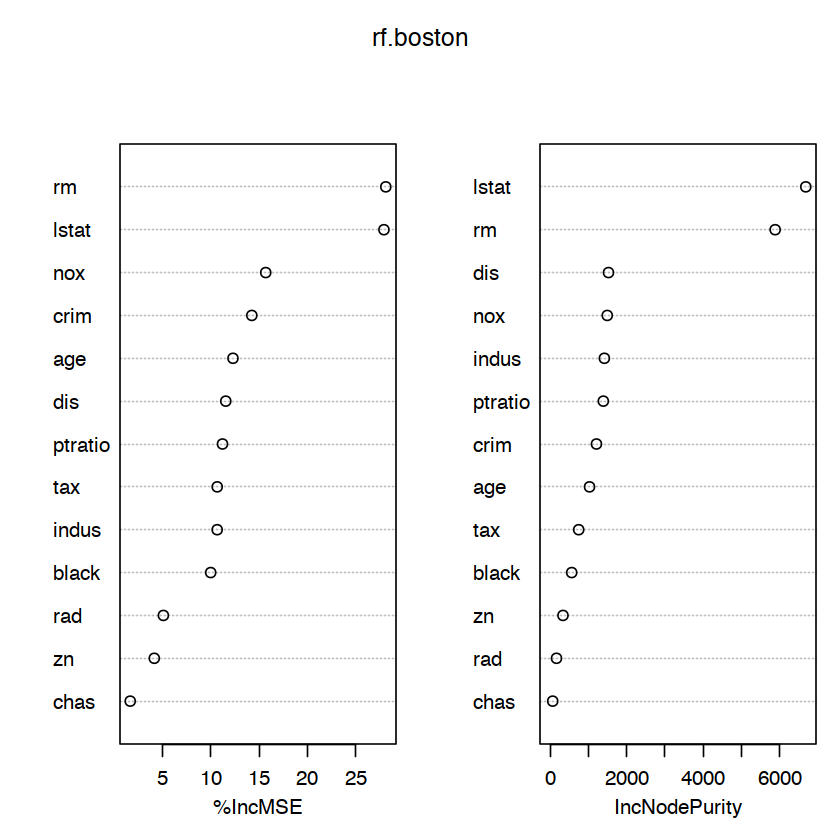

In [25]:
rf.boston=randomForest(medv~.,data=Boston, subset=train, importance=TRUE)
rf.boston
yhat.rf = predict(rf.boston, newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)
importance(rf.boston)
varImpPlot(rf.boston)

**IncMSE**: mean decrease of accuracy in predictions on the out of bag samples when a given variable is excluded from the model 


**IncNodePurity**: total decrease in node impurity that results from splits over that variable, averaged over all trees

# Boosting

Distribution not specified, assuming gaussian ...


,var,rel.inf
,<chr>,<dbl>
lstat,lstat,37.16235101
rm,rm,26.35219033
dis,dis,8.26311122
crim,crim,7.67672954
age,age,5.22106698
black,black,3.90400766
nox,nox,3.42356110
tax,tax,2.95298012
ptratio,ptratio,2.27983381


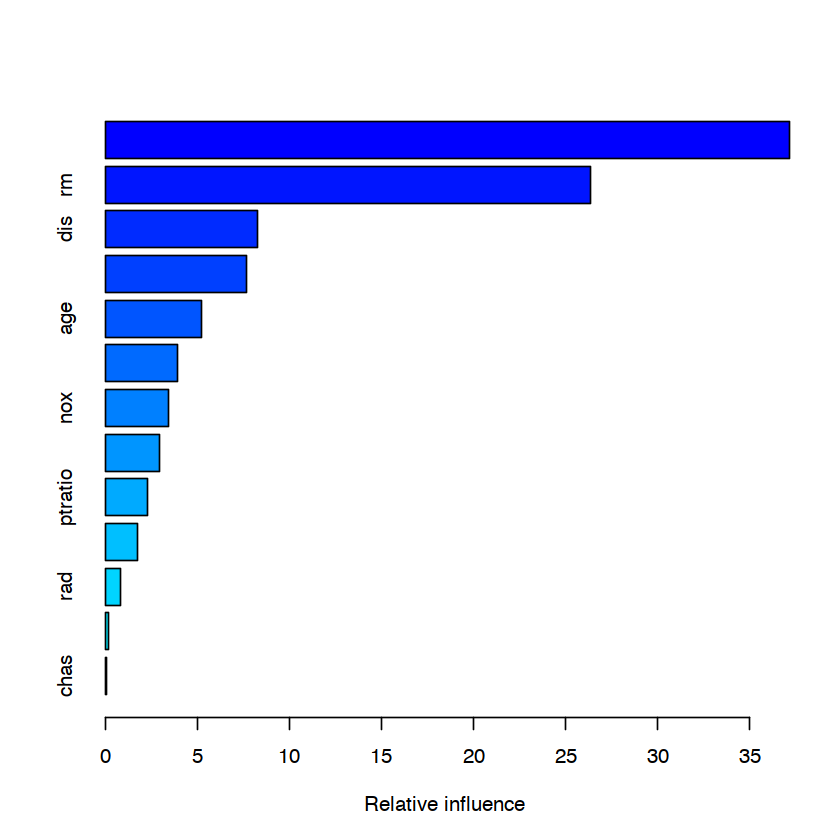

In [29]:
library(gbm)
set.seed(1)
boost.boston=gbm(medv~., data=Boston[train,], n.trees=5000, interaction.depth=4) #shrinkage=0.001
summary(boost.boston)

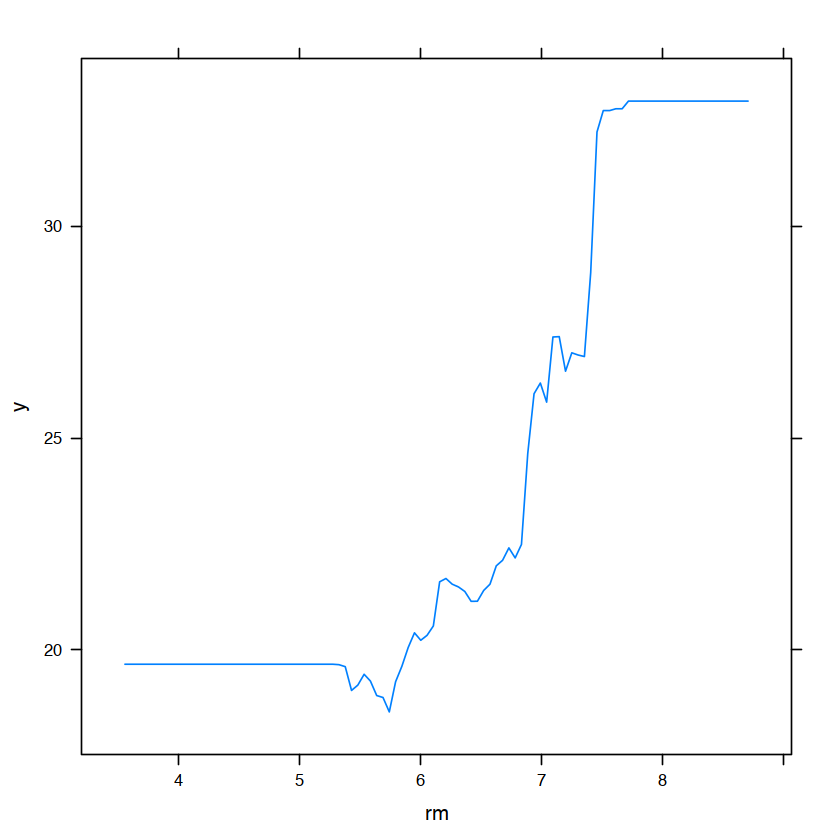

[1] 12.37538

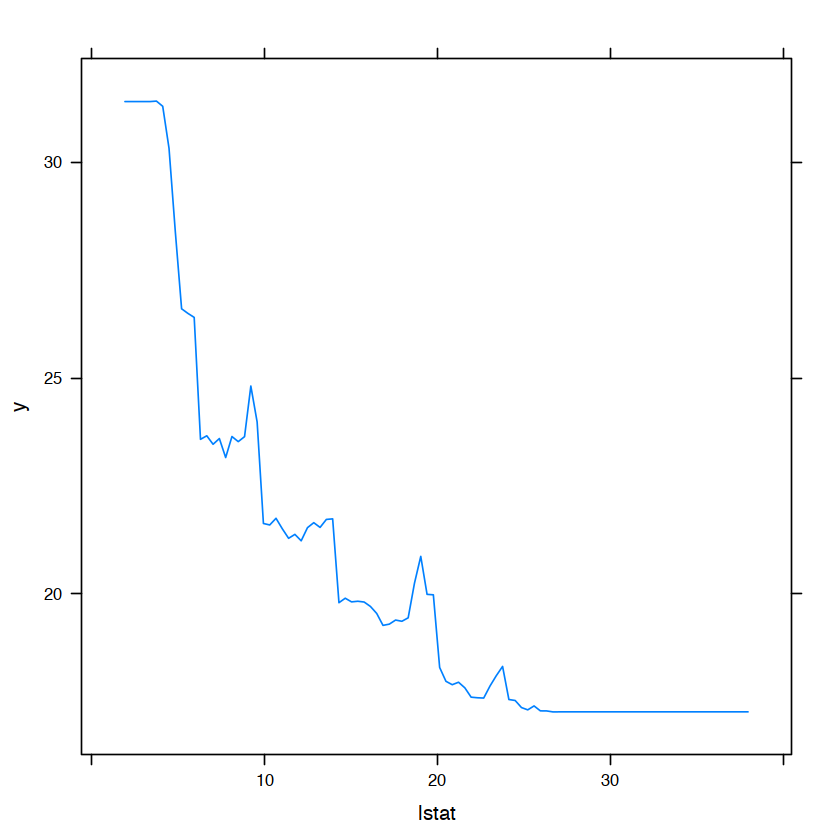

In [30]:
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

# Example: OOB vs Testing Errors

In [31]:
oob.err=double(13)
test.err=double(13)
for(mtry in 1:13){
  fit=randomForest(medv~.,data=Boston,subset=train,mtry=mtry,ntree=400)
  oob.err[mtry]=fit$mse[400]
  pred=predict(fit,Boston[-train,])
  test.err[mtry]=with(Boston[-train,],mean((medv-pred)^2))
  cat(mtry," ")
}

1  2  3  4  5  6  7  8  9  10  11  12  13  

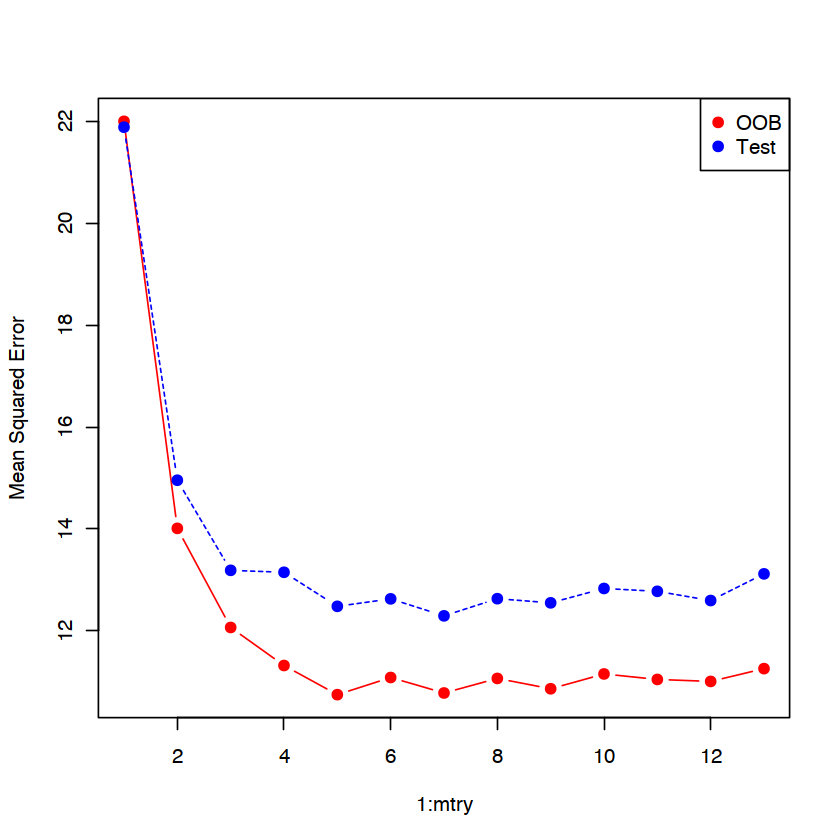

In [32]:
matplot(1:mtry,cbind(test.err,oob.err),pch=19,col=c("red","blue"),type="b",ylab="Mean Squared Error")
legend("topright",legend=c("OOB","Test"),pch=19,col=c("red","blue"))